<a href="https://colab.research.google.com/github/MiltonJairV/talento-tech/blob/main/4caso-estudio-final/proyecto_final1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt

# Importa un archivo desde el drive
from google.colab import drive
drive.mount('/content/drive')

# Subo el archivo y lo leo con pandas.
df = pd.read_csv('Coffe_sales.csv')

# Muestra las primeras 5 filas del archivo para verificar que se leyó correctamente
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


([<matplotlib.patches.Wedge at 0x7f8d95cf8290>,
 [Text(0.6854034313715248, 0.8603616310971449, '35.76'),
  Text(-0.6739129544638415, 0.8693913559530119, '32.82'),
  Text(-1.0972398209762944, 0.07787666700565514, '25.96'),
  Text(-0.8551771587351146, -0.6918612774088003, '30.86'),
  Text(-0.27236947554970975, -1.0657461558874028, '27.92'),
  Text(0.3118176509235418, -1.0548790227189677, '37.72'),
  Text(0.7198781399544472, -0.8317304032051045, '23.02'),
  Text(0.9321178121908031, -0.5840859390506085, '38.7'),
  Text(1.0279188734960594, -0.3916411488985707, '28.9'),
  Text(1.0711840267386983, -0.25012952816464507, '21.06'),
  Text(1.0904351542402584, -0.14474520509165045, '33.8'),
  Text(1.0983419339525293, -0.06037380327110203, '18.12'),
  Text(1.0999270919846629, -0.0126646088831511, '24.0')],
 [Text(0.3738564171117408, 0.46928816241662447, '29'),
  Text(-0.3675888842530044, 0.47421346688346094, '14'),
  Text(-0.5984944478052514, 0.04247818200308461, '13'),
  Text(-0.46646026840097154,

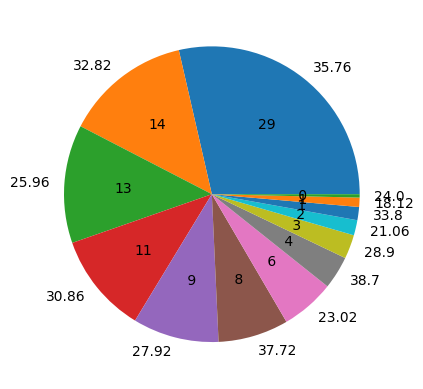

In [ ]:
# revisando cuantos valores hay por cada precio
counts = df["money"].value_counts()
plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

In [ ]:
# Elimino los datos con poca representación
precio_eliminar = ["24.0","18.12","33.8","21.06","28.9","38.7","23.02","37.72","27.92"]

porcentaje_umbral = 0.10 # 10%
total_elementos = len(df)
valores_a_eliminar = counts[counts / total_elementos < porcentaje_umbral].index

print(f"\nValores en 'money' a eliminar (menos representativos): {list(precio_eliminar)}")
df_filtrado = df[~df["money"].isin(valores_a_eliminar)].copy()
df_filtrado ["money"].unique()


Valores en 'money' a eliminar (menos representativos): ['24.0', '18.12', '33.8', '21.06', '28.9', '38.7', '23.02', '37.72', '27.92']


array([32.82, 35.76, 30.86, 25.96])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# reemplazar los nombres de las categorías por números para el clasificador
df3 = df_filtrado.copy()
df3["money"] = df3["money"].replace({32.82: 0, 35.76: 1, 30.86: 2, 25.96: 3})
df3.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
285,15,card,0.0,Americano with Milk,Afternoon,Sat,Apr,6,4,2024-04-20,15:22:40.717000
286,15,card,0.0,Americano with Milk,Afternoon,Sat,Apr,6,4,2024-04-20,15:49:25.148000
293,11,card,0.0,Americano with Milk,Morning,Mon,Apr,1,4,2024-04-22,11:29:27.099000
296,14,card,0.0,Americano with Milk,Afternoon,Tue,Apr,2,4,2024-04-23,14:23:53.144000
298,19,card,0.0,Americano with Milk,Night,Tue,Apr,2,4,2024-04-23,19:42:27.765000


In [ ]:
df3 = {"Money":df3["money"], "Horas_dia":df3["Time_of_Day"], "Ordenes_Dia":df3["Weekdaysort"], "Ordenes_Mes":df3["Monthsort"]}
df3 = pd.DataFrame(df3)
df3.head()

,Money,Horas_dia,Ordenes_Dia,Ordenes_Mes
285,0.0,Afternoon,6,4
286,0.0,Afternoon,6,4
293,0.0,Morning,1,4
296,0.0,Afternoon,2,4
298,0.0,Night,2,4


In [ ]:
y=df3["Money"]
x=df3.drop("Money", axis=1)
print (f"X: {x}")
print (f"Y: {y}")

X:       Horas_dia  Ordenes_Dia  Ordenes_Mes
285   Afternoon            6            4
286   Afternoon            6            4
293     Morning            1            4
296   Afternoon            2            4
298       Night            2            4
...         ...          ...          ...
3542    Morning            7            3
3543  Afternoon            7            3
3544  Afternoon            7            3
3545  Afternoon            7            3
3546      Night            7            3

[2352 rows x 3 columns]
Y: 285     0.0
286     0.0
293     0.0
296     0.0
298     0.0
       ... 
3542    1.0
3543    1.0
3544    1.0
3545    3.0
3546    1.0
Name: Money, Length: 2352, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
print(f"tam x: {x_train.shape}")
print(f"tam y: {y_train.shape}")
print(f"tam x_test: {x_test.shape}")
print(f"tam y_test: {y_test.shape}")

tam x: (1411, 3)
tam y: (1411,)
tam x_test: (941, 3)
tam y_test: (941,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_features = ['Horas_dia']
numerical_features = ['Ordenes_Dia', 'Ordenes_Mes']

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns
)

# Apply transformations to the training and testing data
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# Entreno el modelo
knn_clf.fit(X=x_train_processed, y=y_train)

KNeighborsClassifier()

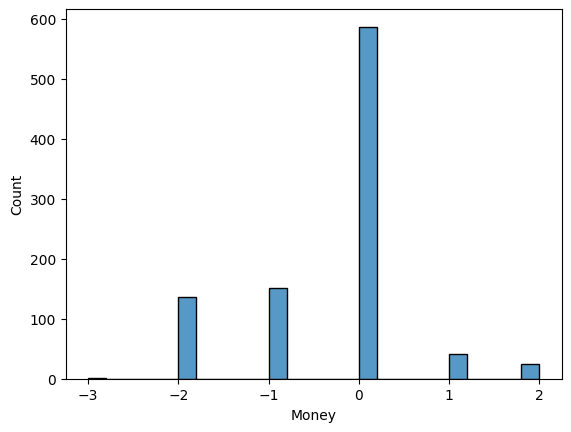

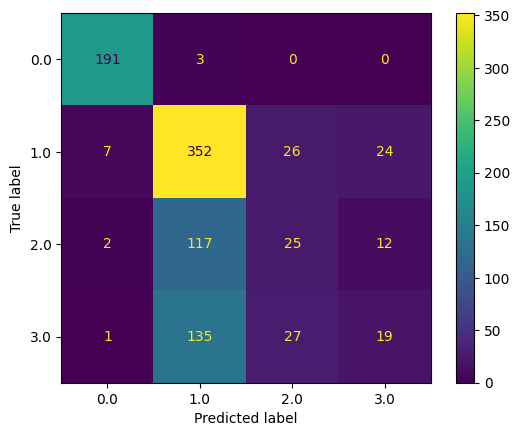

In [ ]:
#Evaluando el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
predicciones = knn_clf.predict(x_test_processed)
diferencias = predicciones - y_test
sns.histplot(diferencias)
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       194
         1.0       0.58      0.86      0.69       409
         2.0       0.32      0.16      0.21       156
         3.0       0.35      0.10      0.16       182

    accuracy                           0.62       941
   macro avg       0.55      0.53      0.51       941
weighted avg       0.57      0.62      0.57       941

